# Practice in Python - Statistics Module I

In this session, I will enhance my skills in Statistics, utilizing:
- Simple, Systematic, and Stratified Sampling;
- Measures of Central Tendency and Variability;
- Normal Distribution;
- Normality Tests;

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skewnorm

In [2]:
dtiris = pd.read_csv('iris.csv')
dtiris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dtinfert = pd.read_csv('infert.csv')
dtinfert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


----
# Simple Sampling
Simple random sampling is a random selection of elements from a population, where each element has an equal chance of being chosen, being a basic technique of statistical sampling.

In [4]:
#Creating a random sampling using the iris.csv database.

#We store a random seed for experimentation and keep the results in stock, even though it's a random sample.
np.random.seed(2345)

simple_sample = np.random.choice(a= [0,1], size=150, replace=True, p=[0.7,0.3])
#Creation of the random sample:
    # (a=[0,1]) -> The sample will be an array of zeros (0) and ones (1)
    # (size=150) -> The size of the sample will be 150 rows (equal to the iris.csv database)
    # (replace=True) -> Allows for replacement of numbers, once a 0 is selected, it goes back to the pool of options for selection again (until size=150)
    # (p=[0.7,0.3]) -> Probability of choosing between elements a=[0,1] {0 has a probability of 0.7 -- 1 has a probability of 0.3}

#Returns the sample
simple_sample

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [5]:
#Checking the size and data of the sample
simple_sample_size = len(simple_sample)
simple_sample_zero = len(simple_sample[simple_sample == 0])
simple_sample_one = len(simple_sample[simple_sample == 1])

print(f'The sample size is {simple_sample_size}')
print(f'Number of elements zero (0): {simple_sample_zero}')
print(f'Number of elements one (1): {simple_sample_one}')

The sample size is 150
Number of elements zero (0): 101
Number of elements one (1): 49


In [12]:
#Using the generated sample vector to separate the elements from the iris.csv dataset (population) randomly
simple_sample_final = dtiris.loc[simple_sample == 0]
simple_sample_final

#We could also leave [sample == 1], which would be our other sample of 49 records.

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In this scenario, we have the iris.csv population dataset - The purpose of this study was to generate a random and unbiased simple sample from this population.
1. We used a random seed to store our sample result, allowing us to always arrive at the same stored result.
2. We created a random sample of the same size as the dataset (size=150), composed of zeros and ones, with a probability of 0.7 ~ 0.3 respectively.
3. We used .loc to select the records [sample == 0] from the sample in the dataset (population).
4. Sample generated randomly and without bias.

----
# Systematic Sampling
Systematic sampling is a sampling technique where elements are selected according to a predefined pattern, such as every k-th element of the population, ensuring representativeness and efficiency in data collection.

In [7]:
#Creating our variables for systematic sampling and defining the pattern of k in the population elements.

population = 150                    #Same number of records as in the iris.csv dataset (real population).
sys_sample = 15                     #The sample will consist of 15 randomly selected records.
k = ceil(population/sys_sample)     #Every 10 records from the population, 1 will be added to the sample.
print(k)


10


In [13]:
#Of those 10 records, when will it add 1 record to the sample? Setting up the random initialization of the sample

r = np.random.randint(low=1, high=k+1, size=1)
print(r)
#We use (.randint) to generate random integers:
    #(low=1) -> sets the lower limit of the interval to 1;
    #(high=k+1) -> sets the upper limit of the interval, in this case 11 (Python excludes the last value, so k+1 for it to consider from 1 to 10);
    #(size=1) -> specifies the output size, generates only 1 random integer;

[2]


In [14]:
#We create a loop structure to sum the next values, based on r.
box = r[0]
drawn = []

for i in range(sys_sample):
    drawn.append(box)
    box += k 


In [15]:
#Result:
print(f'The size of the drawn sample is [{len(drawn)}]')
print(f'The elements composing the sample are: {drawn}')


The size of the drawn sample is [15]
The elements composing the sample are: [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]


In [16]:
#Linking the drawn values with the real population, and filtering the selected elements by the sample.
sys_sample_final = dtiris.loc[drawn]
sys_sample_final

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


In this scenario, we conducted the sampling process systematically:

1. We defined the variables to measure the pattern of data collection. In this case, we desired a sample of 15 records from a population of 150 records. We found the value of k, which systematically defines how many population records will be attached to the sample (in this scenario, every 10 population records, 1 record is attached to the sample).
2. Randomly, we determined which of these 10 records will be allocated to the sample (in this case, r=7). Note: every time the code is executed, the value of [r] changes.
3. We executed a loop to store these 15 sample records in an array/list.
4. We filtered the sample with the population database.

----
# Stratified Sampling
Stratified sampling is a sampling technique where the population is divided into homogeneous groups (strata), and a sample is randomly selected from each stratum, ensuring proportional representativeness of each segment of the population.

### 01. Example of Balanced Stratification:

In [ ]:
#Analyzing and counting how many records exist in the column from which we will generate the stratified sample
dtiris['class'].value_counts()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
#We use the train_test_split method to generate our stratified sample
x_iris, _, y_iris, _ = train_test_split(dtiris.iloc[:,0:4], dtiris.iloc[:,4], test_size=0.5, stratify= dtiris.iloc[:,4])
y_iris.value_counts()

# Uses the train_test_split function to split the data into training and testing sets
    # (dtiris.iloc[:,0:4]) -> The input data are the first four columns (features).
    # (dtiris.iloc[:,4]) -> The labels are the values from the fifth column (labels).
    # (test_size=0.5) -> The test_size parameter defines the proportion of the test set, in this case, 50%
    # (stratify= dtiris.iloc[:,4]) -> Ensures that the labels are stratified, maintaining the same class proportion in the training and testing sets
    # The result is assigned to the variables x_iris (features), y_iris (training labels),
    # (_) Two unused variables to store the testing sets


class
Iris-setosa        25
Iris-virginica     25
Iris-versicolor    25
Name: count, dtype: int64

In [ ]:
#Linking and filtering the sample values with the population values
str_sample_balanced = dtiris.loc[y_iris.index]
str_sample_balanced

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
67,5.8,2.7,4.1,1.0,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


About the process:

- **x_iris** stores the feature data (i.e., columns) specified in *dtiris.iloc[:,0:4]*|. Here, *iloc[:,0:4]* selects all rows from the columns first to fourth (0 to 3) in dtiris, which correspond to the features that will be used to train the model.

- **y_iris** stores the label data, which is taken only from the column specified in *dtiris.iloc[:,4]*. Here, *iloc[:,4]* selects all rows from the fifth column (index 4) in dtiris, which contains the labels.

- **test_size** is the parameter determining the proportion of data to be used as the test set. In this case, test_size=0.5 means half of the data will be used for testing.

- **stratify=dtiris.iloc[:,4]** is the parameter specifying which column (or series) will be used for stratification of the data. Stratification is important to ensure that class proportions are maintained in the training and testing sets. Here, *dtiris.iloc[:,4]* selects the fifth column (index 4) in dtiris, which contains the labels. This means stratification will be done based on the labels, ensuring that proportions of each class are maintained in the training and testing sets.

### 02. Example of Unbalanced Stratification:

In [ ]:
#Analyzing and counting how many records exist in the column from which we will generate the stratified sample
dtinfert['education'].value_counts()

education
6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: count, dtype: int64

In [ ]:
#We use the train_test_split method to generate our stratified sample
x_infert, _, y_infert, _ = train_test_split(dtinfert.iloc[:,2:9], dtinfert.iloc[:,1], test_size=0.6, stratify=dtinfert.iloc[:,1])
y_infert.value_counts()

education
6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: count, dtype: int64

In [ ]:
#Linking and filtering the sample values with the population values
str_sample_unbalanced = dtinfert.loc[y_infert.index]
str_sample_unbalanced

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
223,224,12+ yrs,28,1,0,0,0,59,42
147,148,12+ yrs,26,2,0,0,1,65,49
164,165,12+ yrs,23,1,0,0,1,83,40
76,77,12+ yrs,31,2,0,1,1,77,53
67,68,12+ yrs,28,3,1,1,2,68,58
...,...,...,...,...,...,...,...,...,...
74,75,12+ yrs,26,2,0,1,2,75,49
110,111,6-11yrs,34,3,0,0,0,28,31
0,1,0-5yrs,26,6,1,1,2,1,3
123,124,6-11yrs,39,3,1,0,0,41,33


About the process:
- The return (y_infert.value_counts()) contains only a fraction of the original data, not 60% as expected.
- The reason for this is that the train_test_split function divides the data in such a way that the proportion between the classes is maintained in the training and testing sets. Therefore, even if you specify test_size=0.6, the function will ensure that the distribution of classes is preserved, which may result in a different split than expected in absolute terms.
- You are viewing the class counts in the y_infert set, which corresponds to the target set for training (labels). Therefore, these numbers represent 40% of the original training set dtinfert, while the remaining 60% were allocated to the test set.

----
# Central Tendency and Variability
Measures of centrality are values that represent the center of a dataset, such as mean, median, and mode. Measures of variability quantify the dispersion or variation of the data around the measures of centrality, including standard deviation and interquartile range.

In [ ]:
#Creating a variable for study
players = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

In [ ]:
#Checking the measures of centrality of the data
mean_players = np.mean(players)
median_players = np.median(players)

print(f'The MEAN of the dataset is [{mean_players:.2f}]')
print(f'The MEDIAN of the dataset is [{median_players:.2f}]')

The MEAN of the dataset is [181111.11]
The MEDIAN of the dataset is [40000.00]


In [ ]:
#Checking the measures of variability of the data -- Creating the quartiles of the variable 'players'
quartiles = np.quantile(players, [0, 0.25, 0.5, 0.75, 1])
quartiles

# [0, 0.25, 0.5, 0.75, 1] -> Specify the desired percentiles: minimum [0], first quartile [0.25], median [0.5], third quartile [0.75], and maximum [1]

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [ ]:
#Visualizing the standard deviation of the variable 'players'
std_players = np.std(players)
print(f'The standard deviation of the dataset is [{std_players:.2f}]')

The standard deviation of the dataset is [240706.57]


In [ ]:
#Using the scipy library to detail the statistics of the variable 'players'
stats.describe(players)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

----
# Normal Distribution
It is a symmetrical statistical distribution in the shape of a bell, where most of the data concentrates around the mean, following a predictable pattern of dispersion relative to that mean.

In [ ]:
#Determining a mean and standard deviation for all challenges in the sequence:
mean_nd = 8 
std_nd = 2

In [ ]:
#CHALLENGE 01: What is the probability of drawing an object with a weight less than 6 kilograms?
challenge_1 = norm.cdf(6, mean_nd, std_nd)
print(f'The probability is [{challenge_1:.4f}] or [{challenge_1*100:.2f}] percent!')

The probability is [0.1587] or [15.87] percent!


In [ ]:
#CHALLENGE 02: What is the probability of drawing an object with a weight greater than 6 kilograms?
challenge_2 = norm.sf(6, mean_nd, std_nd)
print(f'The probability is [{challenge_2:.4f}] or [{challenge_2*100:.2f}] percent!')

The probability is [0.8413] or [84.13] percent!


In [ ]:
#CHALLENGE 03: What is the probability of drawing an object with a weight LESS than 6 kilograms and GREATER than 10 kilograms?
challenge_3 = norm.cdf(6, mean_nd, std_nd) + norm.sf(10, mean_nd, std_nd)
print(f'The probability is [{challenge_3:.4f}] or [{challenge_3*100:.2f}] percent!')

The probability is [0.3173] or [31.73] percent!


In [ ]:
#CHALLENGE 04: What is the probability of drawing an object with a weight less than 10 kilograms and greater than 8 kilograms?
challenge_4 = norm.cdf(10, mean_nd, std_nd) - norm.sf(8, mean_nd, std_nd)
print(f'The probability is [{challenge_4:.4f}] or [{challenge_4*100:.2f}] percent!')

The probability is [0.3413] or [34.13] percent!


About the process:
- When you want to calculate the probability of being less than (<) or equal to (==) a certain value **-- Use [.cdf]**
- When you want to calculate the probability of being greater than (>) a specific value **-- Use [.sf]**

In summary, you choose between (.cdf) and (.sf) depending on the direction of the probability you are interested in calculating:
- If the probability is towards the left: you use (.cdf) i.e., less than (<) or equal to (==)...
- If the probability is towards the right: you use (.sf) i.e., greater than (>)...

----
# Normality Tests
Procedures that evaluate whether a data sample follows a normal distribution are essential for validating assumptions of parametric statistical analysis.

#### Example 01: With normally distributed data

In [ ]:
#Creating a variable with data in a normal distribution - Using rvs (1000 elements)
dtnormalitytests = norm.rvs(size = 1000)
dtnormalitytests

array([-2.42642628e+00, -3.50804044e-01,  8.53284702e-01, -1.32539211e+00,
        1.90482895e-01, -1.62290346e+00, -5.05817602e-01, -6.65689118e-01,
       -1.20222649e+00, -1.14089738e+00, -3.01162804e-01,  1.12582530e+00,
        1.53818010e-01,  1.00573096e+00, -1.32410155e+00,  1.06790127e+00,
       -7.16396929e-01,  7.09584546e-02, -3.16544139e-01, -5.88160183e-01,
       -2.06226312e-01, -8.44215564e-02, -1.19821335e+00, -5.06182133e-01,
        1.99135671e+00, -3.06794827e+00,  8.01370478e-01, -3.58335777e-02,
       -2.77364768e-01,  1.73023366e+00, -1.05805212e+00, -3.68454078e-01,
       -3.32330526e-01, -2.65518261e+00,  1.09290546e+00, -3.52210169e-01,
       -1.06124041e+00, -5.13206448e-01,  1.87554661e+00, -2.73510001e-01,
       -7.46291508e-01, -8.22055221e-01,  9.24798328e-02,  1.43885072e+00,
        1.38807327e+00, -1.22446123e+00,  2.13889646e+00,  7.00415523e-01,
        5.73027368e-01,  2.70451652e-01, -1.61506799e+00, -1.25048658e+00,
        3.41231956e-01, -

Text(0.5, 1.0, 'DataFrame')

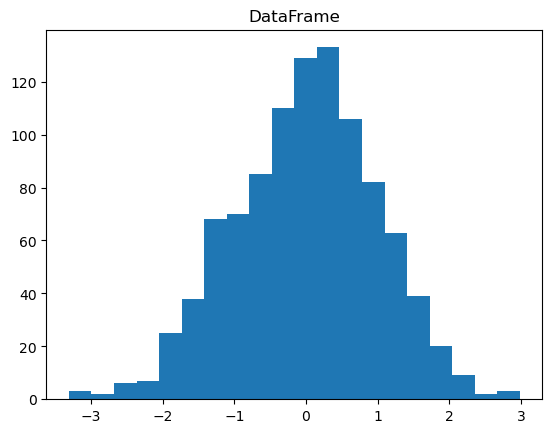

In [ ]:
#Checking in a histogram if our data is normally distributed (if our data is bell-shaped)
plt.hist(dtnormalitytests, bins=20)
plt.title('DataFrame')

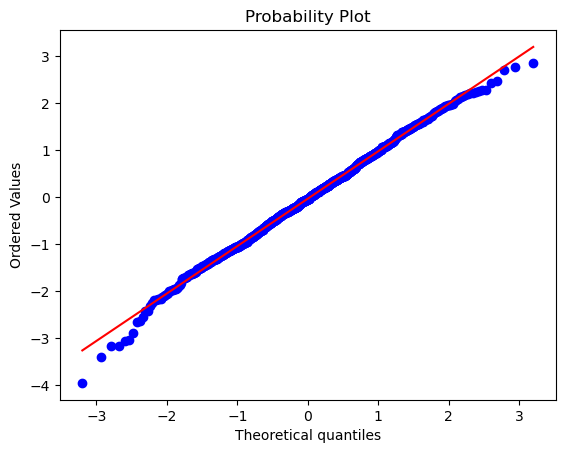

In [ ]:
#Another test we can perform to check the same thing:
fig, ax = plt.subplots()
stats.probplot(dtnormalitytests, fit=True, plot=ax)
plt.show()

#In this test, we expect the return to show that our data conforms to the red line (standard distribution).
    #This indicates that our data is normally distributed

In [ ]:
#Using hypothesis testing to check if the distribution is normally distributed
stats.shapiro(dtnormalitytests)

ShapiroResult(statistic=0.997634768486023, pvalue=0.16098877787590027)

#### Example 02: With non-normally distributed data

In [ ]:
dtnonnormalitytests = skewnorm.rvs(4, size=1000)
dtnonnormalitytests

array([ 5.68265800e-01,  1.20337557e+00, -1.77841255e-01,  1.01890149e+00,
        6.06609037e-01,  6.01815046e-01,  1.37573382e-01,  6.01315222e-01,
        1.30688643e+00,  7.59186343e-01,  1.64903635e+00,  3.06932614e-01,
        5.80835424e-01,  1.22308093e-01,  1.90234359e+00,  5.50534002e-01,
        1.81811465e+00,  1.25341567e+00, -1.89087466e-02,  1.15785814e+00,
        1.39700848e+00,  4.00186392e-01,  1.56166354e+00,  1.06045760e+00,
        1.39536180e+00,  1.97904149e+00,  7.71615294e-01,  7.49279678e-01,
        2.24278104e-01,  9.69458784e-01,  9.75448183e-01,  9.84359951e-01,
        5.57423268e-01,  8.91546835e-01, -3.96190501e-01,  1.94696721e+00,
        1.32829041e+00,  6.07080822e-01,  6.50195991e-01,  3.45767558e+00,
        2.23765674e+00,  1.90631300e+00,  1.28094891e+00, -9.52592097e-02,
        1.51297276e-01,  8.71853082e-01,  1.77644832e-01,  1.38934453e+00,
        7.20258169e-01,  4.05096575e-01,  1.25835201e+00,  7.83669218e-01,
        1.11414168e+00,  

Text(0.5, 1.0, 'DataFrame')

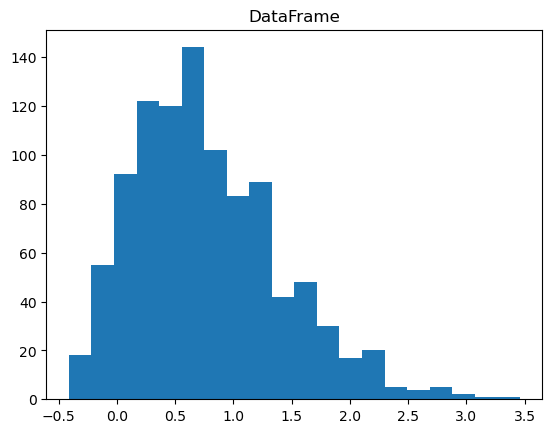

In [ ]:
#Checking in a histogram if our data is normally distributed (if our data is bell-shaped)
plt.hist(dtnonnormalitytests, bins=20)
plt.title('DataFrame')

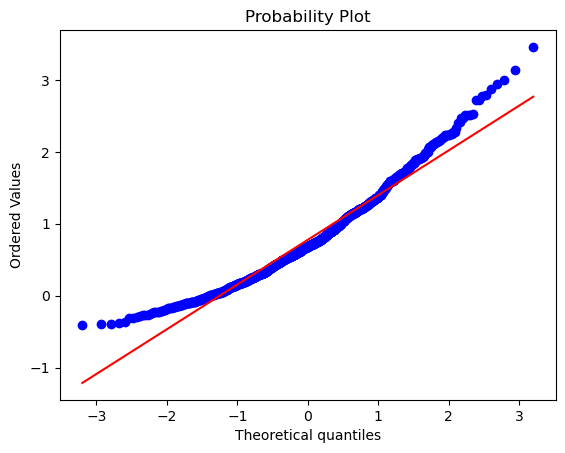

In [ ]:
#Another test we can perform to check the same thing:
fig, ax = plt.subplots()
stats.probplot(dtnonnormalitytests, fit=True, plot=ax)
plt.show()

#In this test, we expect the return to show that our data conforms to the red line (standard distribution).
    #This indicates that our data is normally distributed

In [ ]:
#Using hypothesis testing to check if the distribution is normally distributed
stats.shapiro(dtnonnormalitytests)

ShapiroResult(statistic=0.9623947143554688, pvalue=2.237688887199332e-15)